In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,  silhouette_samples
from sklearn.linear_model import LinearRegression

In [232]:
# Data loading

dataset = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
dataset = dataset.drop([0, 1, 2, 3, 504], axis=1)
dataset.columns = list(range(500))
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,...,14828,14822,14815,14815,14817,14819,14820,14822,14820,14819
1,14820,14822,14820,14826,14824,14822,14820,14822,14823,14821,...,14828,14817,14824,14822,14824,14819,14820,14819,14822,14820
2,14820,14820,14822,14825,14820,14824,14824,14819,14823,14824,...,14820,14821,14820,14820,14818,14821,14823,14820,14820,14821
3,14828,14822,14818,14824,14824,14822,14820,14822,14824,14820,...,14824,14826,14822,14821,14820,14828,14820,14822,14823,14822
4,14823,14815,14823,14821,14827,14820,14823,14824,14816,14821,...,14820,14820,14823,14828,14824,14820,14824,14824,14822,14825


Text(0, 0.5, 'bit ADC')

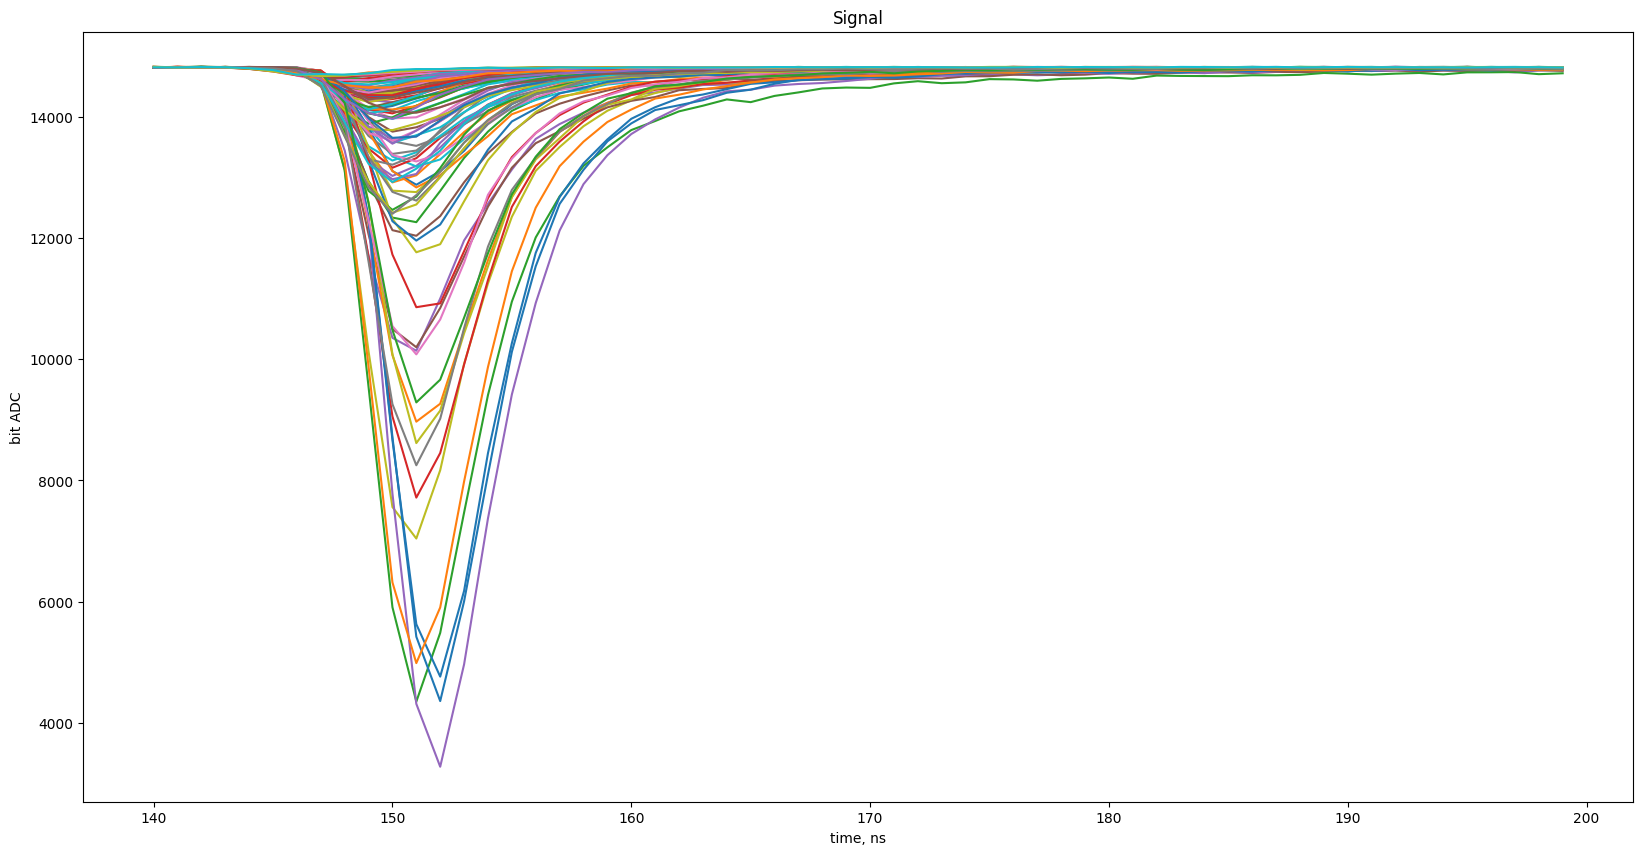

In [233]:
N=range(0,100)
ax = dataset.T[N][140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

Text(0, 0.5, 'bit ADC')

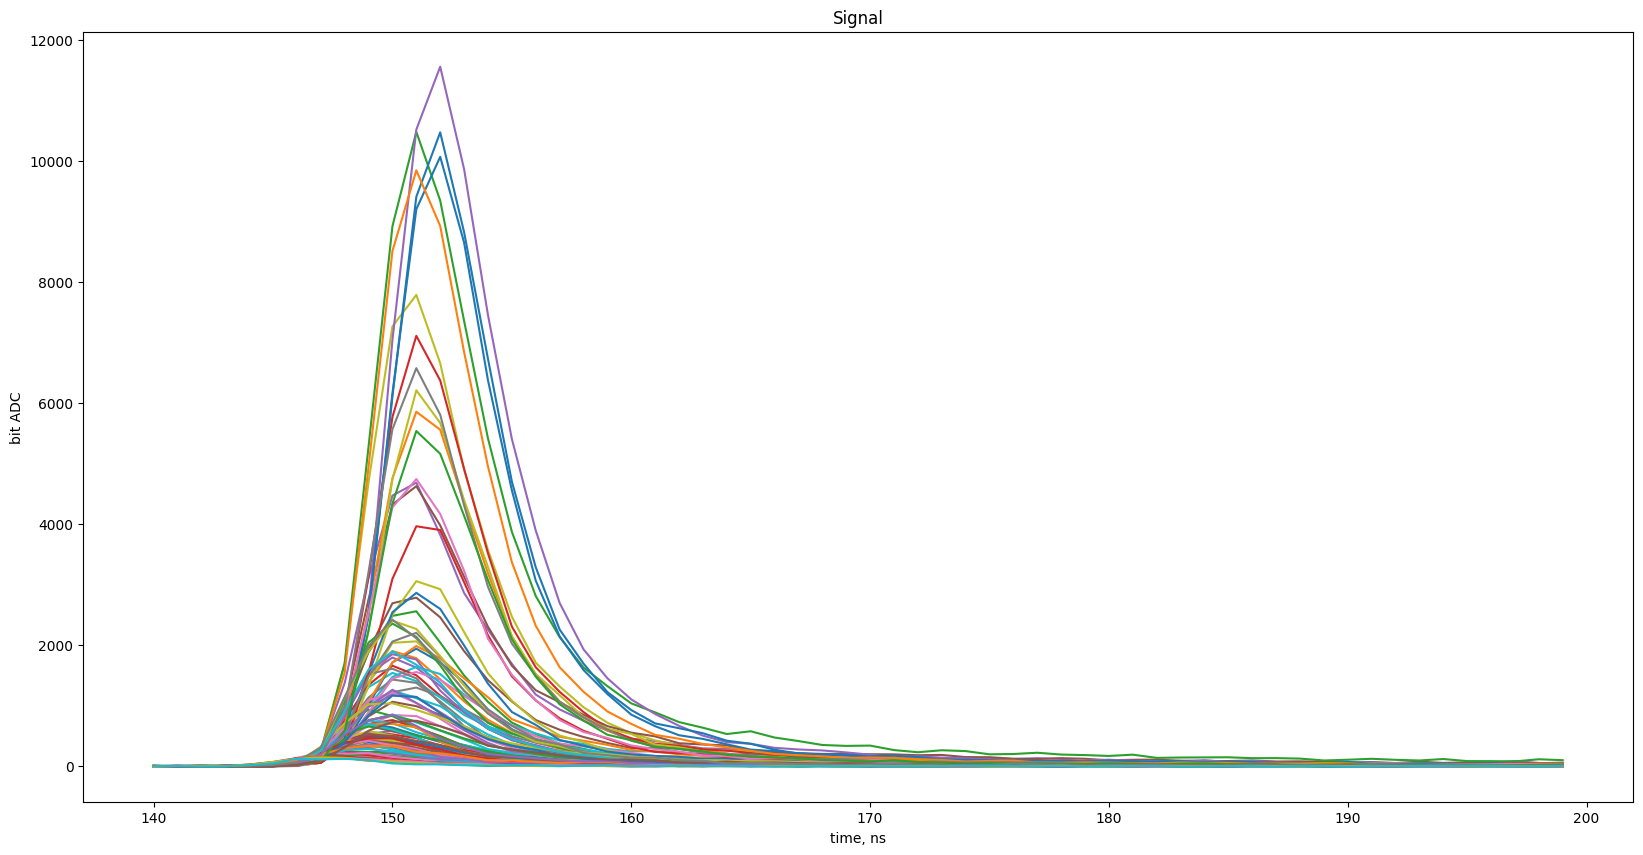

In [234]:
ax = (2**14-dataset.T[N]-1560)[140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")


In [235]:
from scipy.integrate import trapz
X = dataset.loc[:, dataset.columns[140:200]]
x = np.linspace(0, 1, 60)
y = np.array(-X.loc[:,:] + 2**14 - 1560).T
area = trapz(y, x, axis=0)
df = pd.DataFrame((area))
df.columns = ['area']
df

,area
0,70.500000
1,200.254237
2,278.211864
3,71.406780
4,194.118644
...,...
23474,55.889831
23475,701.127119
23476,598.796610
23477,185.855932


In [236]:
df['amplitude'] = pd.DataFrame((y.T.max(axis = 1)))
df

,area,amplitude
0,70.500000,533
1,200.254237,1903
2,278.211864,2560
3,71.406780,566
4,194.118644,1796
...,...,...
23474,55.889831,504
23475,701.127119,5767
23476,598.796610,4999
23477,185.855932,1457


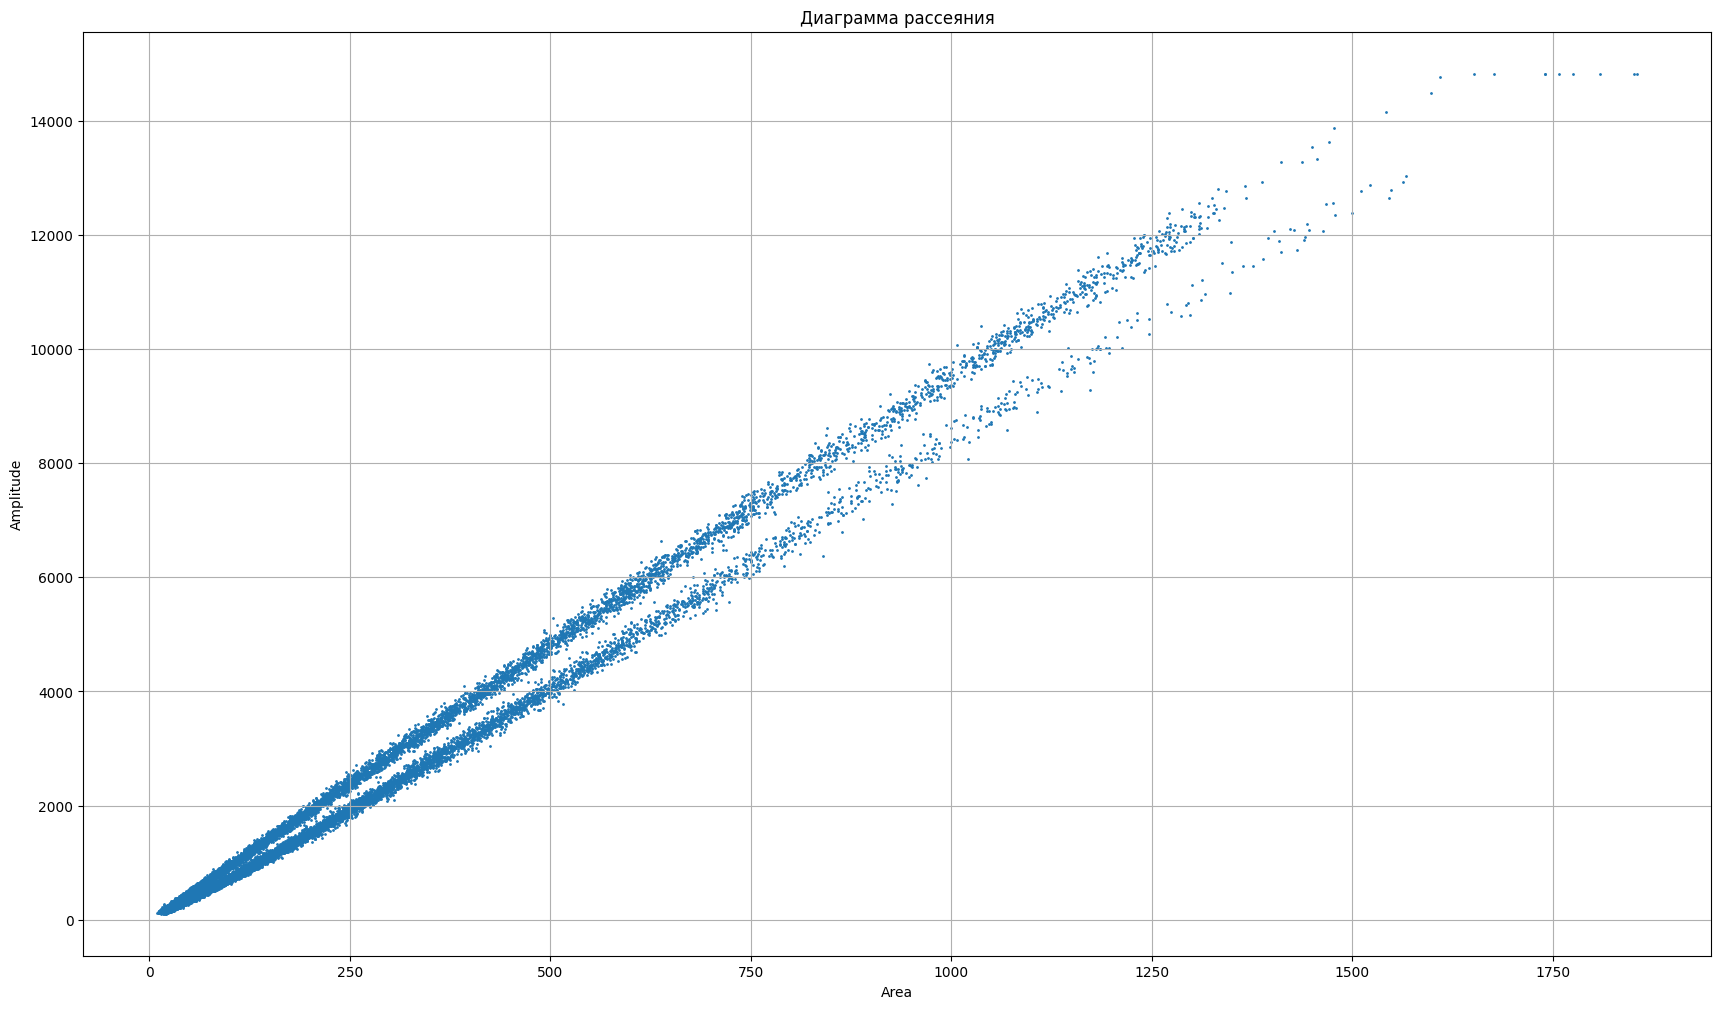

In [237]:
plt.figure(figsize=(21,12))
plt.scatter(df['area'], df['amplitude'], s=1)
plt.xlabel("Area")
plt.ylabel("Amplitude")
plt.title("Диаграмма рассеяния")
plt.grid()
plt.show()

In [238]:
area = np.array(df['area']).reshape(-1, 1)
ampl = np.array(df['amplitude']).reshape(-1, 1)

print((area).shape)
print((ampl).shape)

(23479, 1)
(23479, 1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


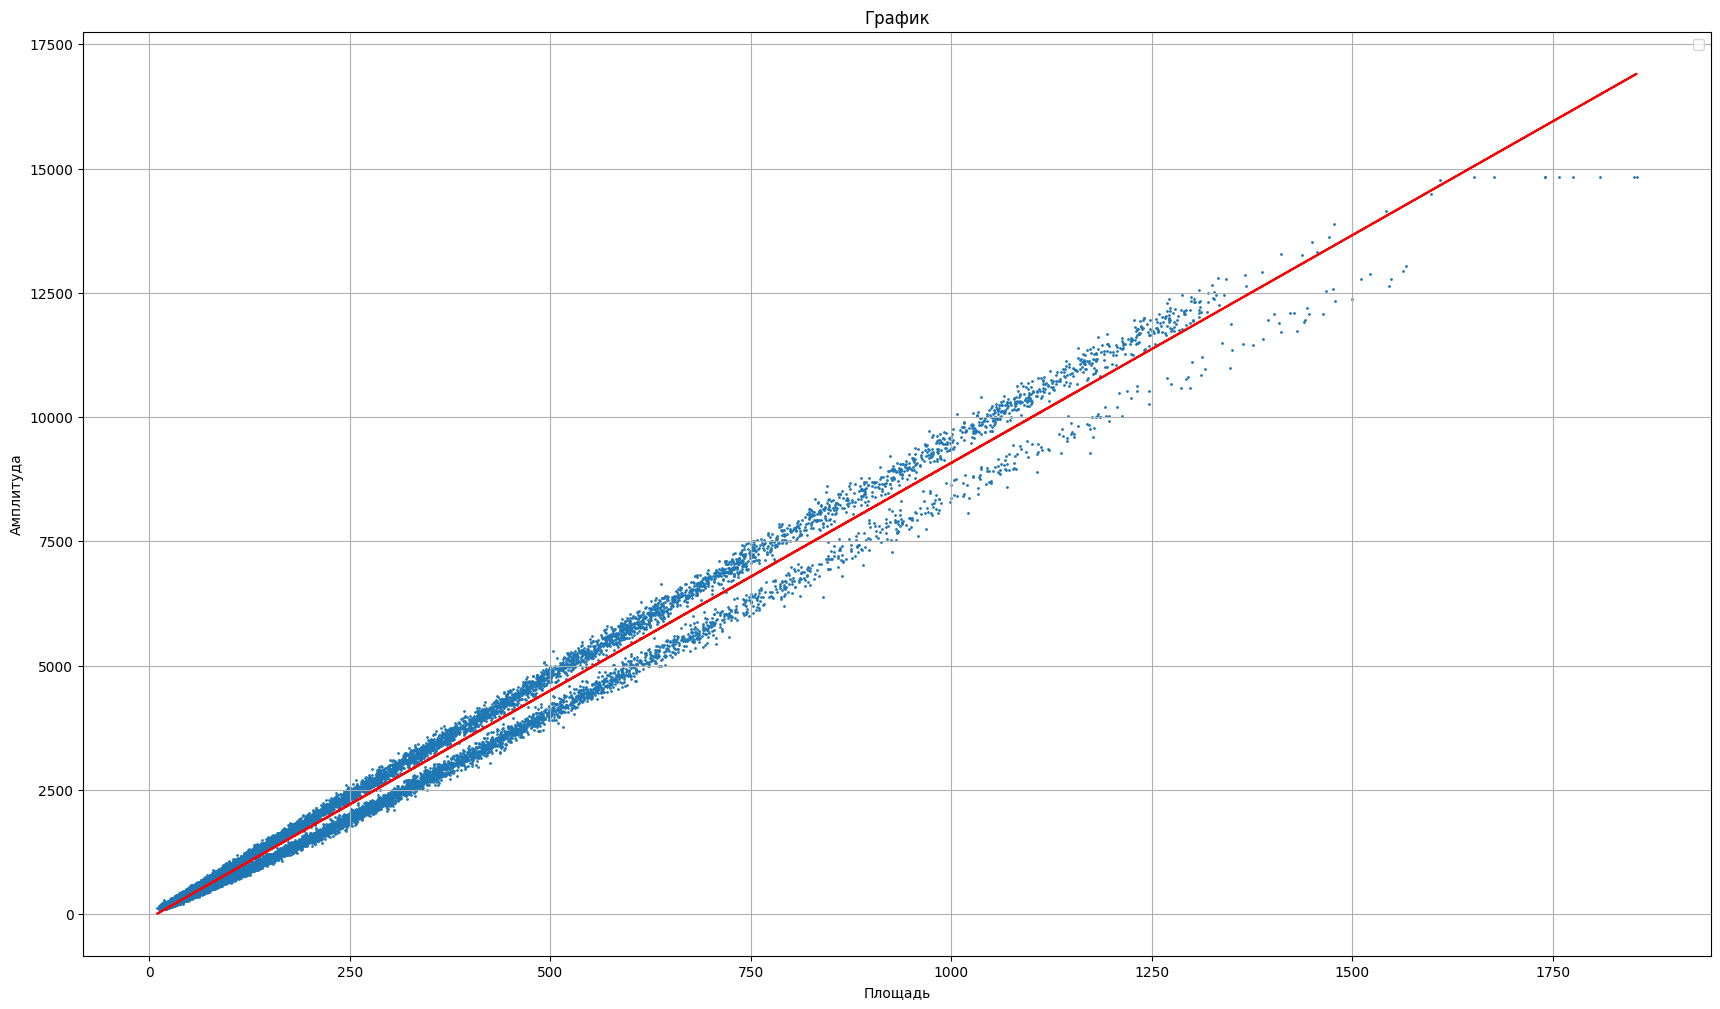

In [239]:
model = LinearRegression()
model.fit(area, ampl)
line = model.predict(area)

plt.figure(figsize=(21,12))
plt.scatter(area, ampl, s=1)
plt.plot(area, line, color='red')
plt.xlabel('Площадь')
plt.ylabel('Амплитуда')
plt.title('График')
plt.legend()
plt.grid()
plt.show()

In [240]:
ind_pred_0 = (ampl > line).astype(int) # индексы 0 класса
ind_pred_1 = (ampl < line).astype(int) # индексы 1 класса

# line_labels = ind_pred_1 # лэйблы при таком способе разделения

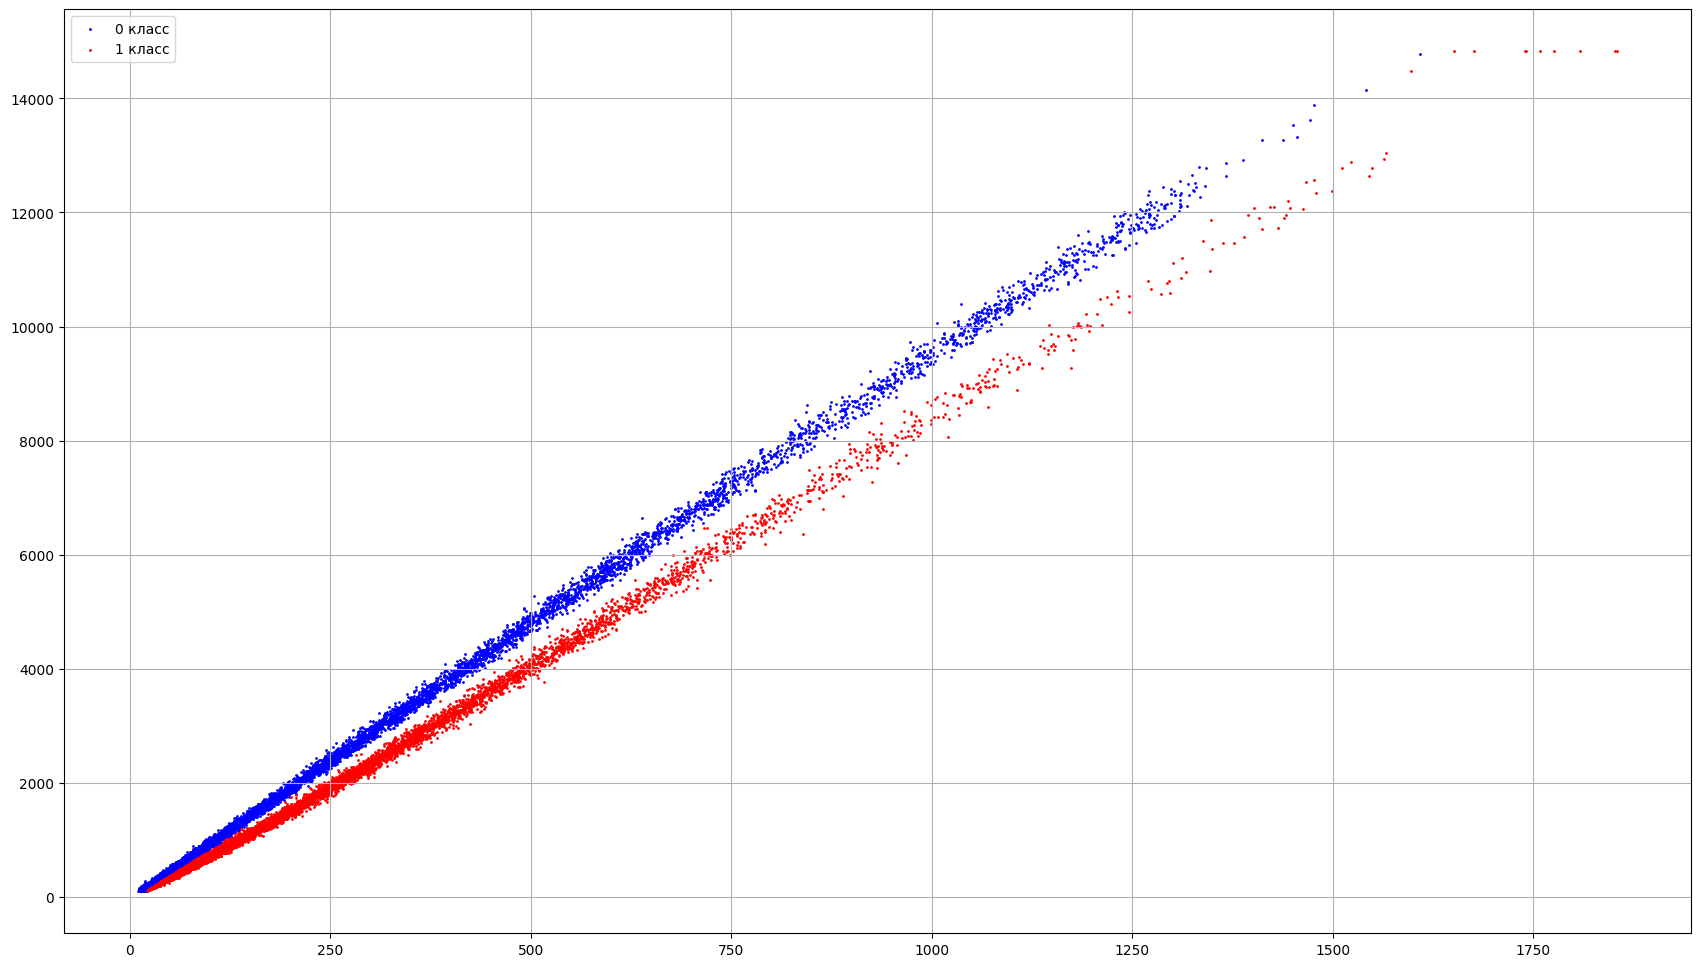

In [241]:
plt.figure(figsize=(21,12))
plt.scatter(area[ind_pred_0 == 1], ampl[ind_pred_0 == 1], s=1, label='0 класс', c='blue')
plt.scatter(area[ind_pred_1 == 1], ampl[ind_pred_1 == 1], s=1, label='1 класс', c='red')
plt.grid()
plt.legend()
plt.show()

### Гистограмма рассеяния

In [242]:
x_1 = np.linspace(0, 1, 19)
y_1 = np.array(-dataset.loc[:,140:158] + 2**14 - 1560) # short
a_short = np.trapz(y_1, x_1)
a_short.shape

(23479,)

In [243]:
x_2 = np.linspace(0,1,61)
y_2 = np.array(-dataset.loc[:,140:200] + 2**14 - 1560) # long
a_long = np.trapz(y_2, x_2)
a_long.shape

(23479,)

In [244]:
psd = (a_long - a_short) / a_long

Text(0.5, 1.0, 'Гистограмма значений')

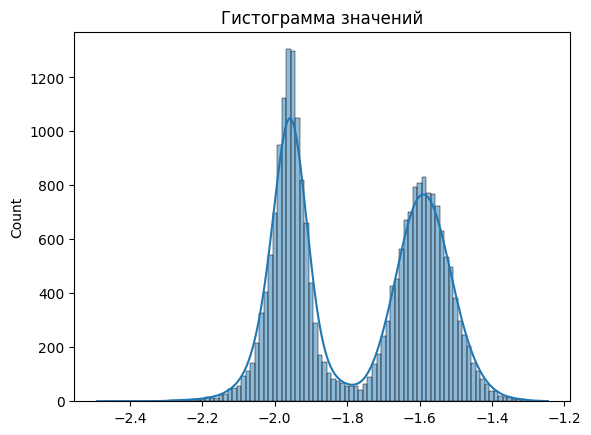

In [245]:
sns.histplot(psd, bins=100, kde=True)
plt.title('Гистограмма рассеяния')

In [246]:
hist, bin_edges = np.histogram(psd, bins=100)
indices = np.arange(len(hist))
ind_hist = np.column_stack((indices, hist))
#ind_hist 56 57

In [247]:
thr = (bin_edges[56] + bin_edges[57]) / 2

p_0 = (psd < thr).astype(int)
p_1 = (psd >= thr).astype(int)

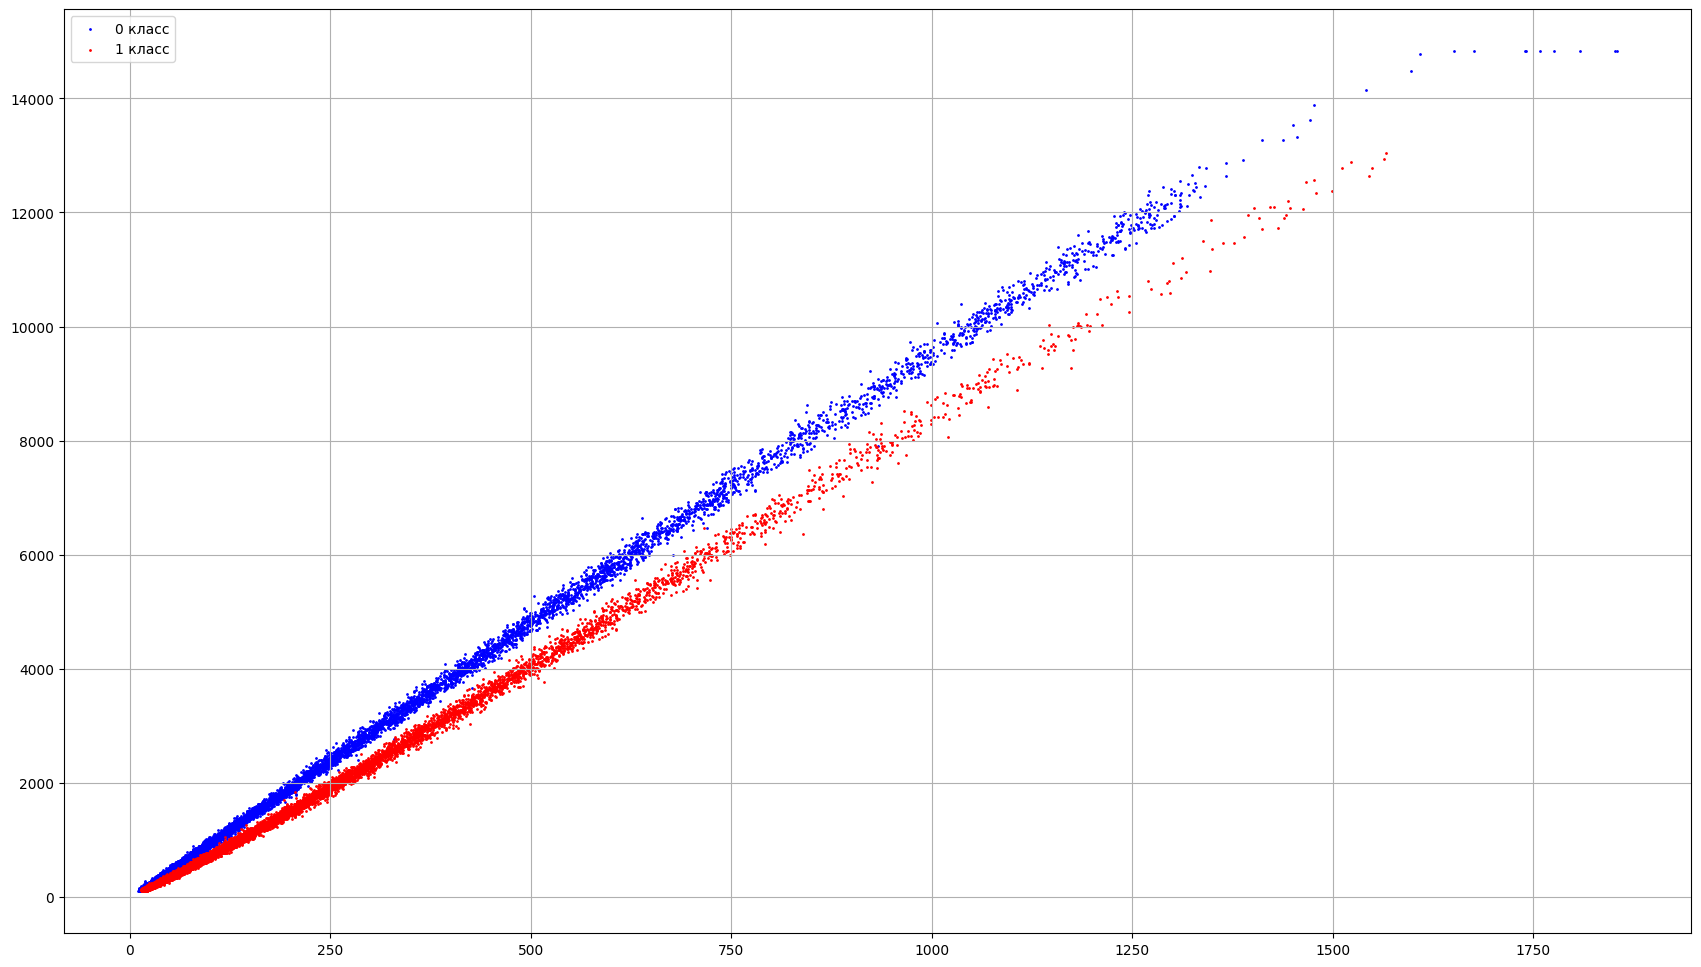

In [248]:
plt.figure(figsize=(21,12))
plt.scatter(area[p_0 == 1], ampl[p_0 == 1], s=1, label='0 класс', c='blue')
plt.scatter(area[p_1 == 1], ampl[p_1 == 1], s=1, label='1 класс', c='red')
plt.grid()
plt.legend()
plt.show()

In [249]:
indices = np.where(ind_pred_1[:, 0] != p_1)[0]
indices.shape

(2614,)

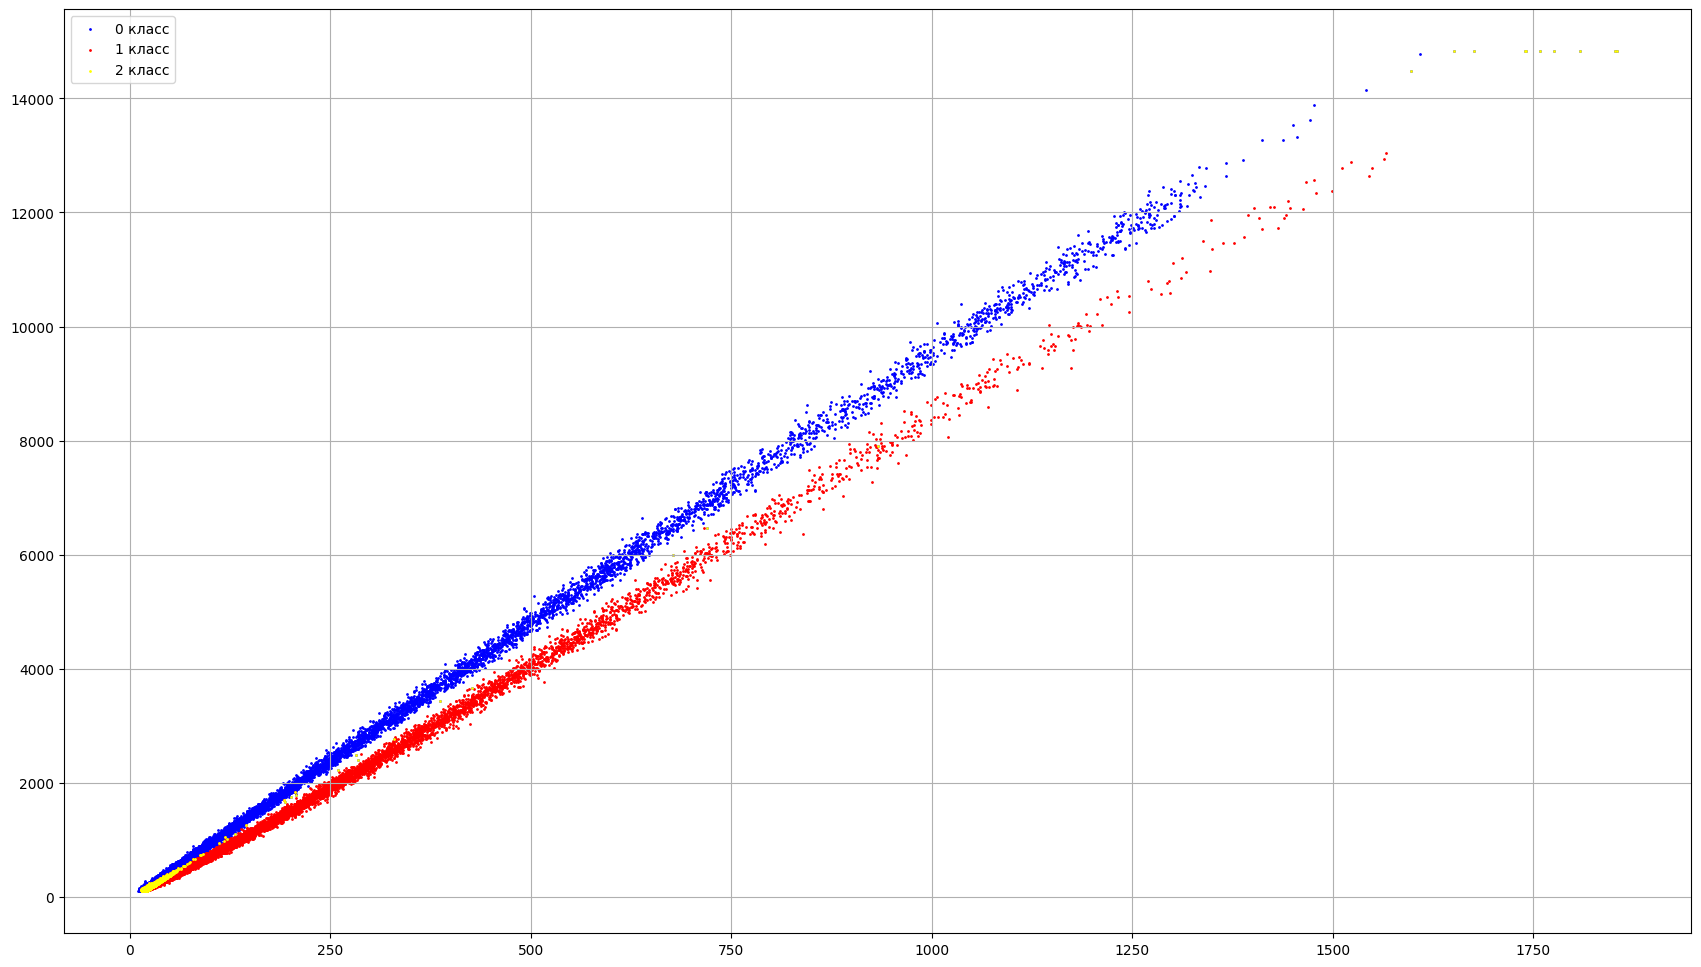

In [250]:
plt.figure(figsize=(21,12))
plt.scatter(area[p_0 == 1], ampl[p_0 == 1], s=1, label='0 класс', c='blue')
plt.scatter(area[p_1 == 1], ampl[p_1 == 1], s=1, label='1 класс', c='red')
plt.scatter(area[indices], ampl[indices], s=1, label='2 класс', c='yellow')
plt.grid()
plt.legend()
plt.show()

In [251]:
tr_0 = (p_0 + ind_pred_0[:, 0] == 0)
tr_1 = (p_0 + ind_pred_0[:, 0] == 2)
tr_2 = (p_0 + ind_pred_0[:, 0] == 1)
# print(tr_0.shape, tr_1.shape, tr_2.shape)

In [252]:
index = np.arange(0, 23479)
cluster = np.zeros(23479)
cluster[tr_0] = 0
cluster[tr_1] = 1
cluster[tr_2] = 2
cluster = cluster.astype(int)

In [253]:
ans_df = pd.DataFrame({'index': index, 'cluster': cluster})
ans_df = ans_df.sort_values(by=['cluster', 'index'])

In [254]:
ans_df.to_csv('output.csv', index=False)

### Еще

In [255]:
df['angle'] = df.apply(lambda row: row['amplitude'] / row['area'], axis=1)

In [258]:
df['psd'] = psd

In [264]:
mmsc = StandardScaler()
X_scaled = mmsc.fit_transform(df[['psd', 'angle']])

kmeans = KMeans(n_clusters=2, random_state=47, n_init=10)

labels_kmeans = kmeans.fit_predict(X_scaled)
df['cluster'] = labels_kmeans

silhouette_avg_kmeans = silhouette_score(X_scaled, labels_kmeans)
samples = silhouette_samples(X_scaled, labels_kmeans)

print(f"Silhouette score = {silhouette_avg_kmeans}")

Silhouette score = 0.7157972787679041


In [266]:
centers = kmeans.cluster_centers_
X = df[['psd', 'angle']]
distances = np.linalg.norm(X - centers[labels_kmeans], axis=1)
distances

array([8.77057537, 8.66424122, 8.36445652, ..., 9.54251218, 9.04406313,
       8.61377587])

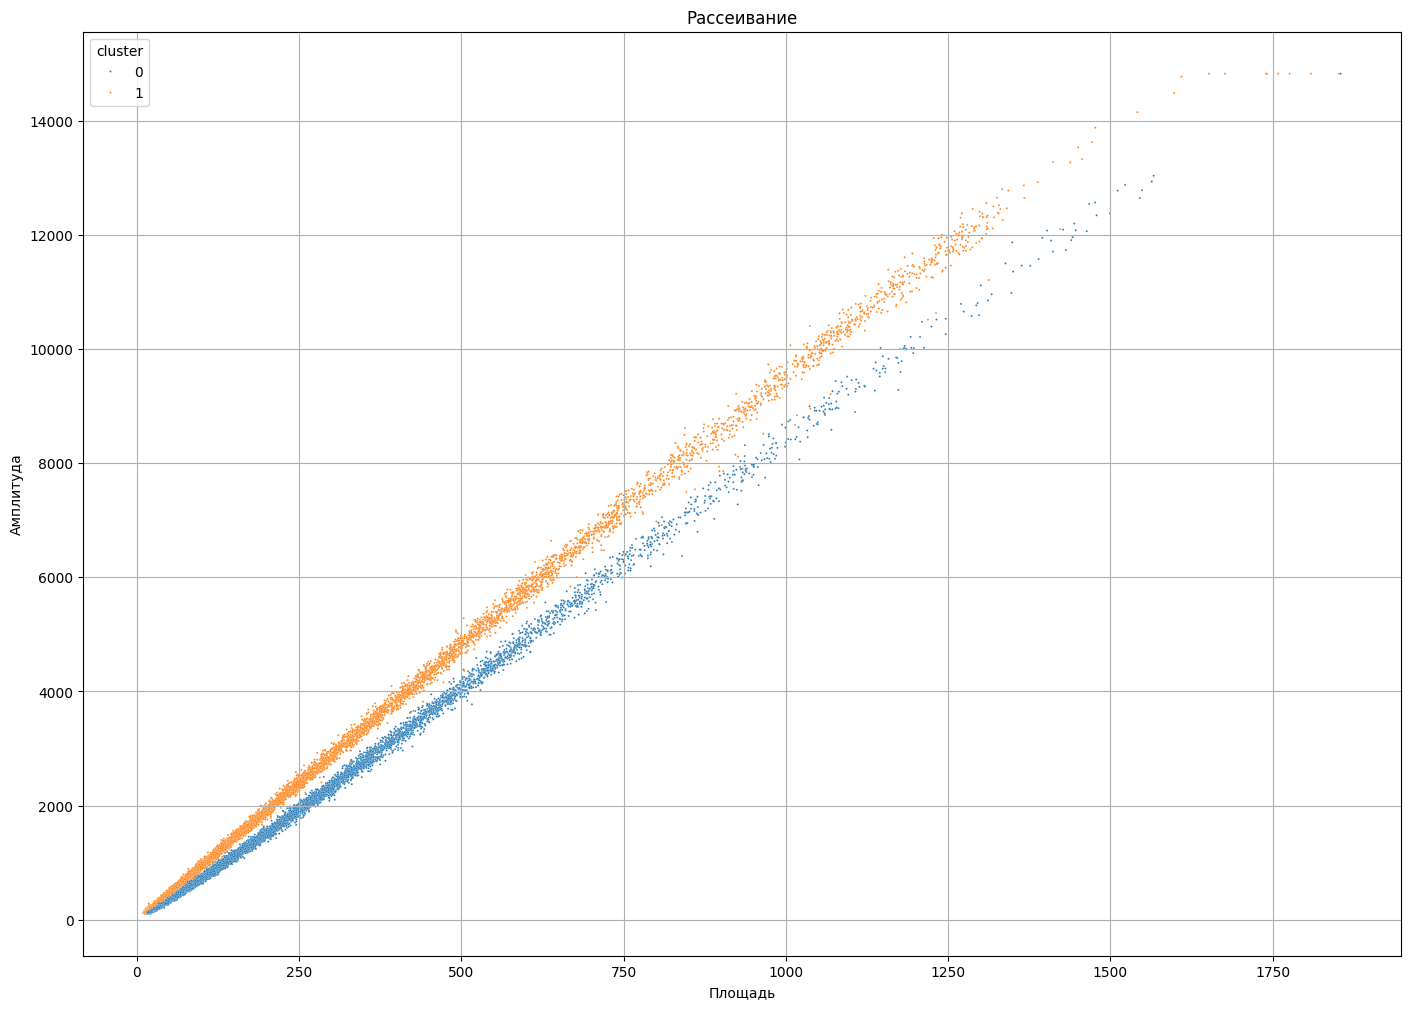

In [270]:
plt.figure(figsize=(17, 12))
sns.scatterplot(data=df, x='area', y='amplitude', hue='cluster', s = 2)
plt.xlabel("Площадь")
plt.ylabel("Амплитуда")
plt.title("Рассеивание")
plt.grid()
plt.show()

In [271]:
thr = np.percentile(distances, 99)
df.loc[distances > thr, 'cluster'] = 2

In [273]:
ind = np.arange(0, 23479)
cluster = df['cluster'].astype(int)
ans = pd.DataFrame({'index': ind, 'cluster': cluster})
ans = ans.sort_values(by=['cluster', 'index'])
ans

,index,cluster
0,0,0
3,3,0
5,5,0
6,6,0
7,7,0
...,...,...
22613,22613,2
22622,22622,2
23130,23130,2
23304,23304,2


In [286]:
ans.to_csv('output_kmeans.csv', index=False)

In [287]:
ans

,index,cluster
0,0,0
3,3,0
5,5,0
6,6,0
7,7,0
...,...,...
22613,22613,2
22622,22622,2
23130,23130,2
23304,23304,2
